<a href="https://colab.research.google.com/github/APMAPM1/AI-ML-internship/blob/main/Placement_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = "/content/drive/My Drive/Datasets/placementdata.csv"

In [ ]:
import pandas as pd
df = pd.read_csv(file_path)
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df.isnull().sum()

,0
StudentID,0
CGPA,0
Internships,0
Projects,0
Workshops/Certifications,0
AptitudeTestScore,0
SoftSkillsRating,0
ExtracurricularActivities,0
PlacementTraining,0
SSC_Marks,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [ ]:
df.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


In [ ]:
df['PlacementStatus'] = df['PlacementStatus'].map({'Placed': 1, 'NotPlaced': 0})

In [ ]:
df['ExtracurricularActivities'] = df['ExtracurricularActivities'].map({'Yes': 1, 'No': 0})
df['PlacementTraining'] = df['PlacementTraining'].map({'Yes': 1, 'No': 0})

In [ ]:
df.drop(columns=['StudentID'], inplace=True)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CGPA                       10000 non-null  float64
 1   Internships                10000 non-null  int64  
 2   Projects                   10000 non-null  int64  
 3   Workshops/Certifications   10000 non-null  int64  
 4   AptitudeTestScore          10000 non-null  int64  
 5   SoftSkillsRating           10000 non-null  float64
 6   ExtracurricularActivities  10000 non-null  int64  
 7   PlacementTraining          10000 non-null  int64  
 8   SSC_Marks                  10000 non-null  int64  
 9   HSC_Marks                  10000 non-null  int64  
 10  PlacementStatus            10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB
None


**CGPA and placement status feature selection**


In [ ]:
from scipy.stats import pointbiserialr

# Calculate correlation
correlation, p_value = pointbiserialr(df['CGPA'], df['PlacementStatus'])
print(f"Correlation: {correlation}, P-value: {p_value}")

Correlation: 0.4231314237933326, P-value: 0.0


In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information
mi_score = mutual_info_classif(df[['CGPA']], df['PlacementStatus'])[0]
print(f"Mutual Information Score: {mi_score}")


Mutual Information Score: 0.10902683420022496


In [ ]:
from sklearn.linear_model import LogisticRegression

# Select CGPA as feature and PlacementStatus as target
X = df[['CGPA']]
y = df['PlacementStatus']

# Train model
model = LogisticRegression()
model.fit(X, y)

# Check coefficient
print(f"CGPA Coefficient: {model.coef_[0][0]}")


CGPA Coefficient: 1.6372811658133288


<ipython-input-18-990bc13e1a45>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['PlacementStatus'], y=df['CGPA'], palette=['red', 'green'])


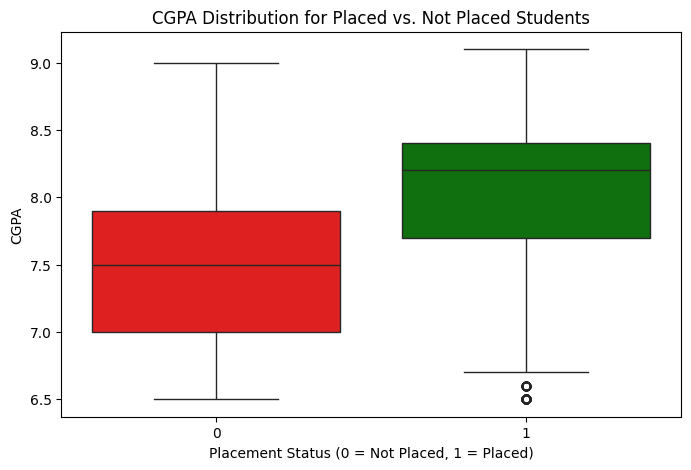

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['PlacementStatus'], y=df['CGPA'], palette=['red', 'green'])
plt.xlabel("Placement Status (0 = Not Placed, 1 = Placed)")
plt.ylabel("CGPA")
plt.title("CGPA Distribution for Placed vs. Not Placed Students")
plt.show()

<ipython-input-19-c9eb3c0f216e>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['PlacementStatus'] == 1]['CGPA'], shade=True, label="Placed", color="green")
<ipython-input-19-c9eb3c0f216e>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['PlacementStatus'] == 0]['CGPA'], shade=True, label="Not Placed", color="red")


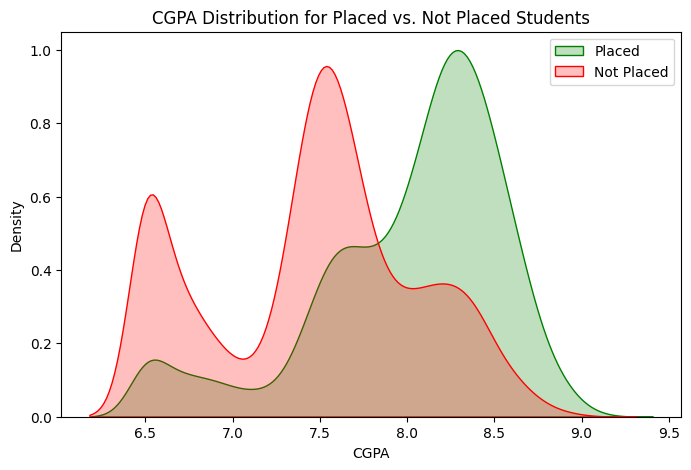

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df['PlacementStatus'] == 1]['CGPA'], shade=True, label="Placed", color="green")
sns.kdeplot(df[df['PlacementStatus'] == 0]['CGPA'], shade=True, label="Not Placed", color="red")
plt.xlabel("CGPA")
plt.ylabel("Density")
plt.title("CGPA Distribution for Placed vs. Not Placed Students")
plt.legend()
plt.show()

<ipython-input-21-2b2664bf0dd0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['PlacementStatus'], y=df['CGPA'], palette=['red', 'green'])


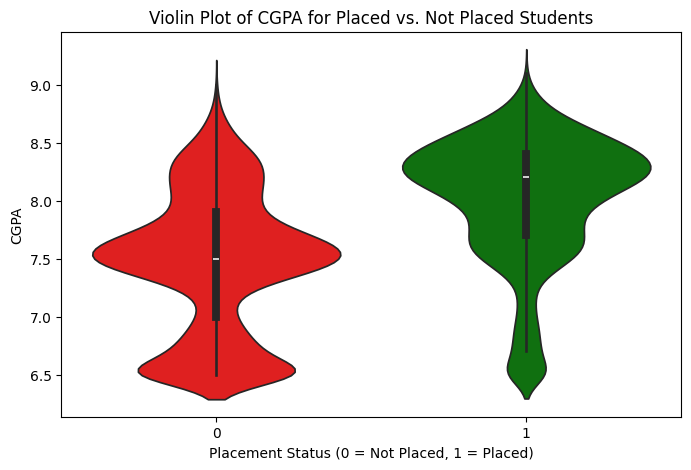

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=df['PlacementStatus'], y=df['CGPA'], palette=['red', 'green'])
plt.xlabel("Placement Status (0 = Not Placed, 1 = Placed)")
plt.ylabel("CGPA")
plt.title("Violin Plot of CGPA for Placed vs. Not Placed Students")
plt.show()

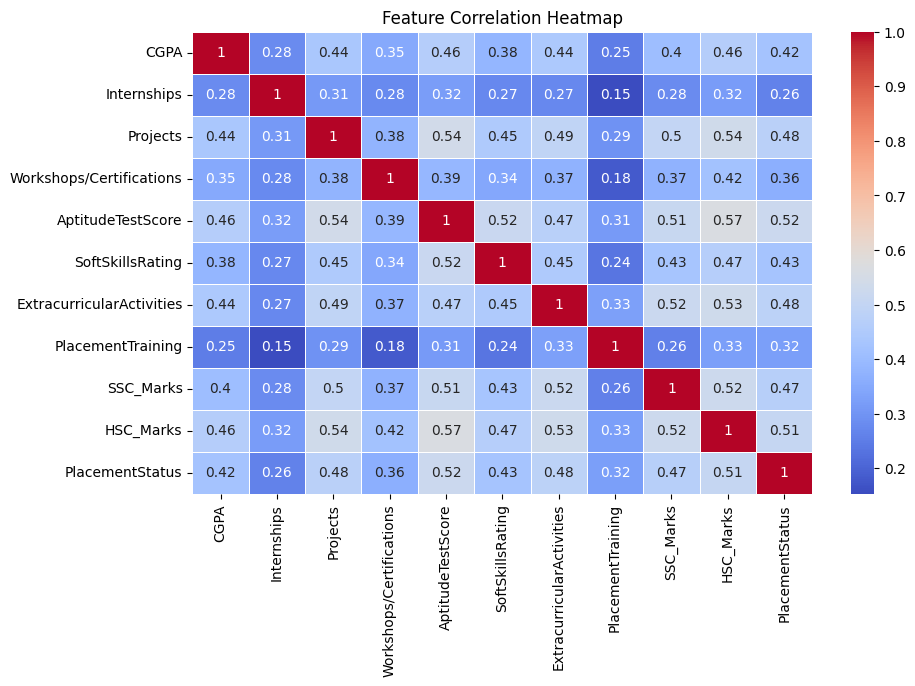

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


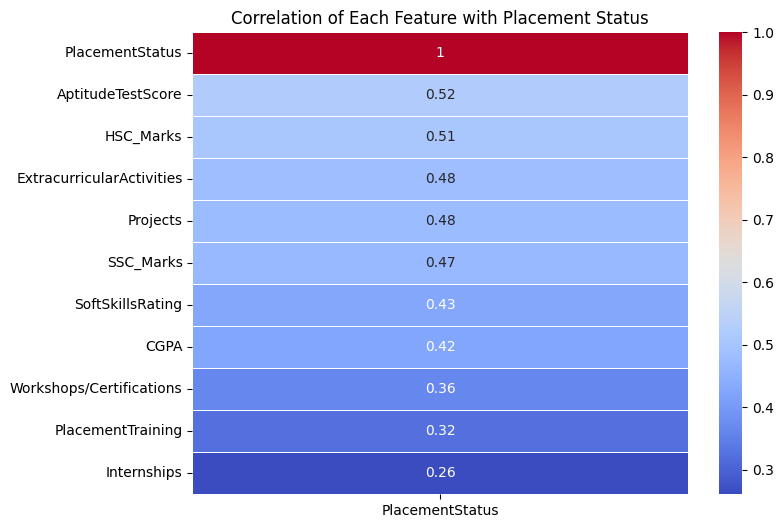

In [ ]:
plt.figure(figsize=(8, 6))

# Compute correlation
correlation_matrix = df.corr()

# Extract correlation of each feature with PlacementStatus
placement_correlation = correlation_matrix["PlacementStatus"].sort_values(ascending=False).to_frame()

# Plot heatmap
sns.heatmap(placement_correlation, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Correlation of Each Feature with Placement Status")
plt.show()


In [ ]:
from itertools import combinations

# Select numeric features
features = df.select_dtypes(include=['float64', 'int64']).columns.drop("PlacementStatus")

# Compute pairwise correlation with PlacementStatus
pairwise_correlations = {}
for feature1, feature2 in combinations(features, 2):
    combined_feature = df[feature1] * df[feature2]  # Multiply the features to check interaction
    pairwise_correlations[f"{feature1} * {feature2}"] = combined_feature.corr(df["PlacementStatus"])

# Convert to DataFrame and sort
pairwise_df = pd.DataFrame(pairwise_correlations.items(), columns=["Feature Combination", "Correlation"])
pairwise_df = pairwise_df.sort_values(by="Correlation", ascending=False)

# Display top interactions
pairwise_df.head(10)


,Feature Combination,Correlation
34,AptitudeTestScore * HSC_Marks,0.583341
33,AptitudeTestScore * SSC_Marks,0.565612
3,CGPA * AptitudeTestScore,0.562402
44,SSC_Marks * HSC_Marks,0.558486
30,AptitudeTestScore * SoftSkillsRating,0.554330
38,SoftSkillsRating * HSC_Marks,0.553636
8,CGPA * HSC_Marks,0.550854
20,Projects * ExtracurricularActivities,0.549435
37,SoftSkillsRating * SSC_Marks,0.535186
7,CGPA * SSC_Marks,0.535102


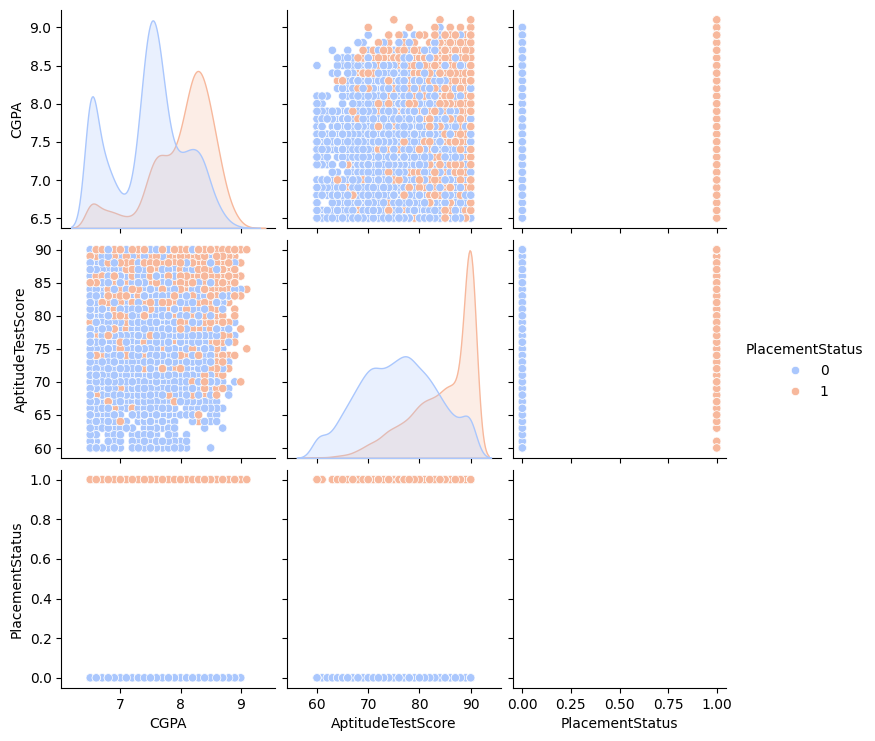

In [ ]:
import seaborn as sns

sns.pairplot(df, vars=["CGPA", "AptitudeTestScore", "PlacementStatus"], hue="PlacementStatus", palette="coolwarm")
plt.show()


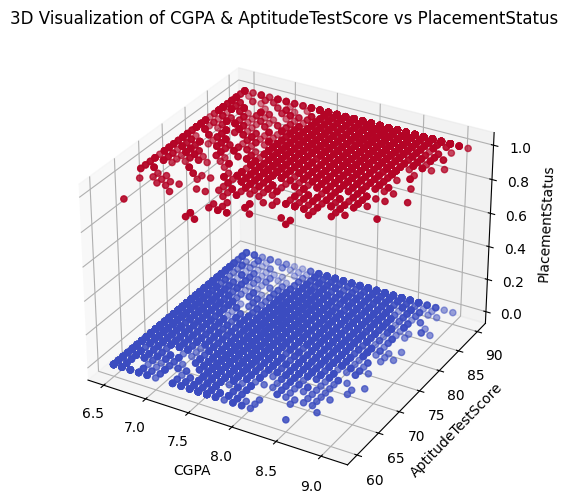

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Select two features and PlacementStatus
ax.scatter(df["CGPA"], df["AptitudeTestScore"], df["PlacementStatus"], c=df["PlacementStatus"], cmap="coolwarm")

ax.set_xlabel("CGPA")
ax.set_ylabel("AptitudeTestScore")
ax.set_zlabel("PlacementStatus")
plt.title("3D Visualization of CGPA & AptitudeTestScore vs PlacementStatus")
plt.show()


In [ ]:
df['PlacementStatus'].value_counts()

,count
PlacementStatus,
0,5803
1,4197


In [ ]:
X = df.drop(columns=['PlacementStatus'])
y = df['PlacementStatus']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.81


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1161
           1       0.77      0.78      0.77       839

    accuracy                           0.81      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.81      0.81      0.81      2000



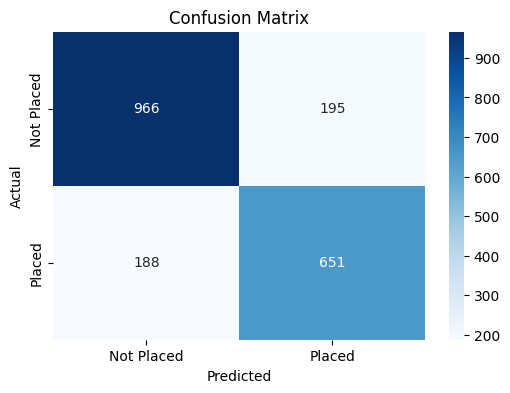

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it as a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Placed", "Placed"], yticklabels=["Not Placed", "Placed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train & Evaluate each model
accuracy_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    acc = accuracy_score(y_test, y_pred)  # Calculate accuracy
    accuracy_results[name] = acc
    print(f"{name} Accuracy: {acc:.2f}")  # Print accuracy

# Sort models by accuracy
sorted_results = sorted(accuracy_results.items(), key=lambda x: x[1], reverse=True)

print("\n🔹 Best Model:")
print(f"{sorted_results[0][0]} with Accuracy: {sorted_results[0][1]:.2f}")

Logistic Regression Accuracy: 0.81
Random Forest Accuracy: 0.79
SVM Accuracy: 0.80
KNN Accuracy: 0.78
Gradient Boosting Accuracy: 0.80

🔹 Best Model:
Logistic Regression with Accuracy: 0.81


In [ ]:
import numpy as np

def predict_placement():
    print("\n🔹 Enter Student Details:")

    # Taking user input
    cgpa = float(input("Enter CGPA: "))
    internships = int(input("Enter Number of Internships: "))
    projects = int(input("Enter Number of Projects: "))
    workshops = int(input("Enter Number of Workshops/Certifications: "))
    aptitude_score = int(input("Enter Aptitude Test Score: "))
    soft_skills = float(input("Enter Soft Skills Rating (0-10): "))
    extra_curricular = int(input("Participated in Extracurricular Activities? (1-Yes, 0-No): "))
    placement_training = int(input("Received Placement Training? (1-Yes, 0-No): "))
    ssc_marks = int(input("Enter SSC Marks: "))
    hsc_marks = int(input("Enter HSC Marks: "))

    # Convert input to NumPy array and reshape it
    user_data = np.array([[cgpa, internships, projects, workshops, aptitude_score, soft_skills,
                           extra_curricular, placement_training, ssc_marks, hsc_marks]])

    # Scale input using StandardScaler (use the same scaler fitted earlier)
    user_data_scaled = scaler.transform(user_data)

    # Predict using the **Logistic Regression model**
    prediction = model.predict(user_data_scaled)

    # Show result
    if prediction[0] == 1:
        print("\n✅ The student is LIKELY TO BE PLACED! 🎉")
    else:
        print("\n❌ The student is NOT LIKELY TO BE PLACED. Keep improving! 📚")

# Run this function to take input and predict
predict_placement()



🔹 Enter Student Details:
Enter CGPA: 8
Enter Number of Internships: 2
Enter Number of Projects: 3
Enter Number of Workshops/Certifications: 1
Enter Aptitude Test Score: 8
Enter Soft Skills Rating (0-10): 7
Participated in Extracurricular Activities? (1-Yes, 0-No): 1
Received Placement Training? (1-Yes, 0-No): 1
Enter SSC Marks: 90
Enter HSC Marks: 91

✅ The student is **LIKELY TO BE PLACED**! 🎉
